Read bike data

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/bike.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Create histograms for all numeric variables

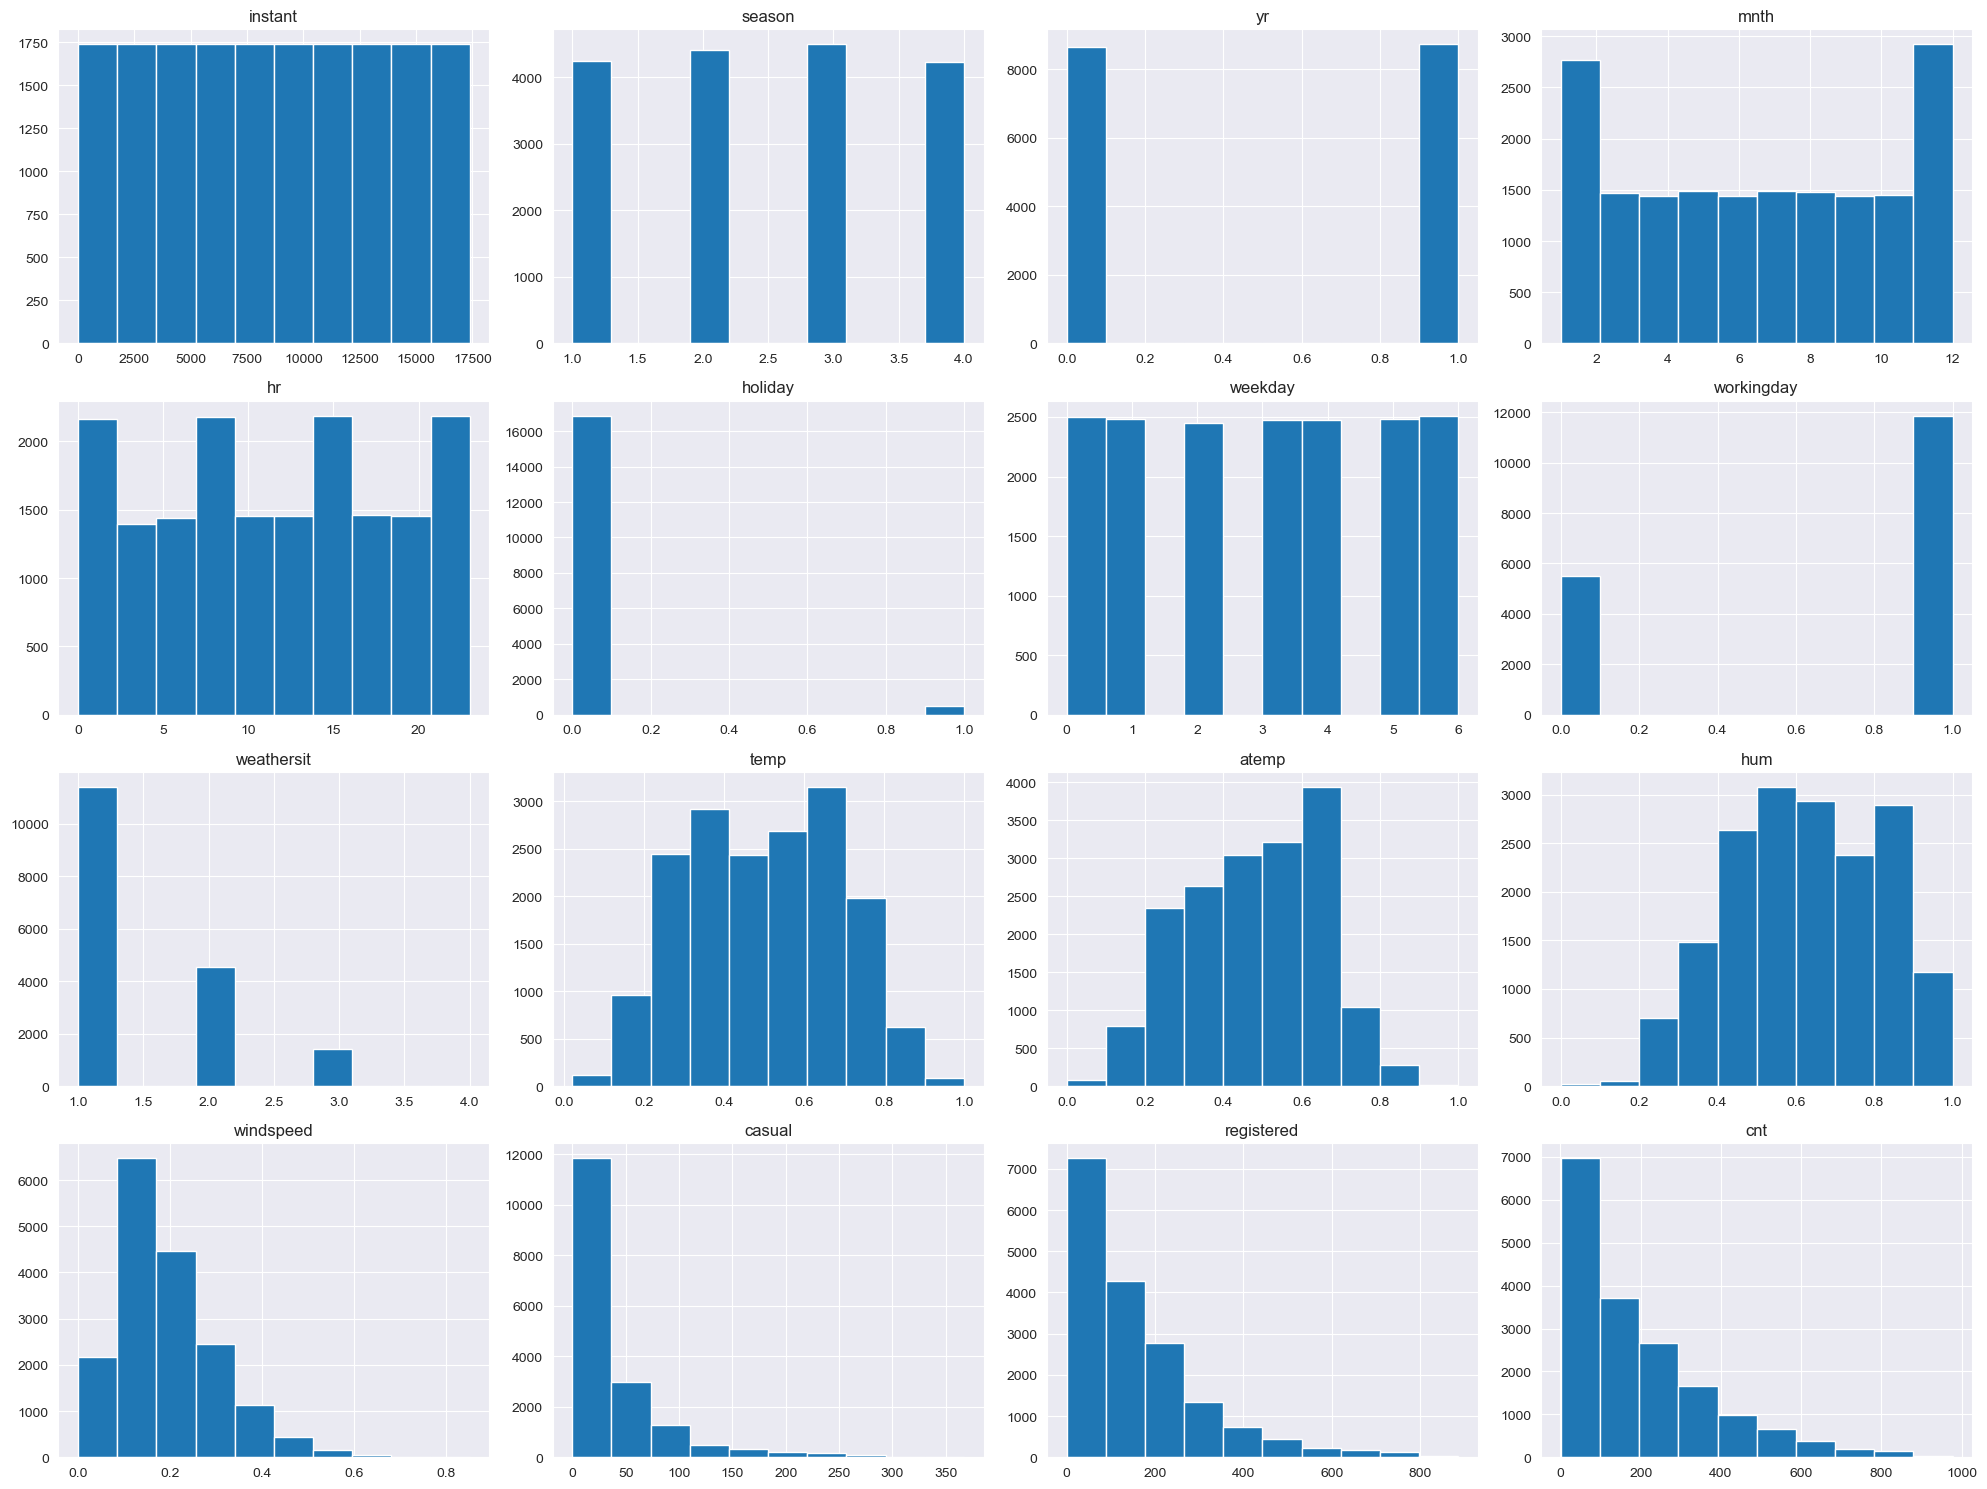

In [34]:
df.hist(bins=10, figsize=(20,15))
plt.tight_layout()
plt.show()

Create a heat map to visualize the interdependencies between numeric variables

<Axes: >

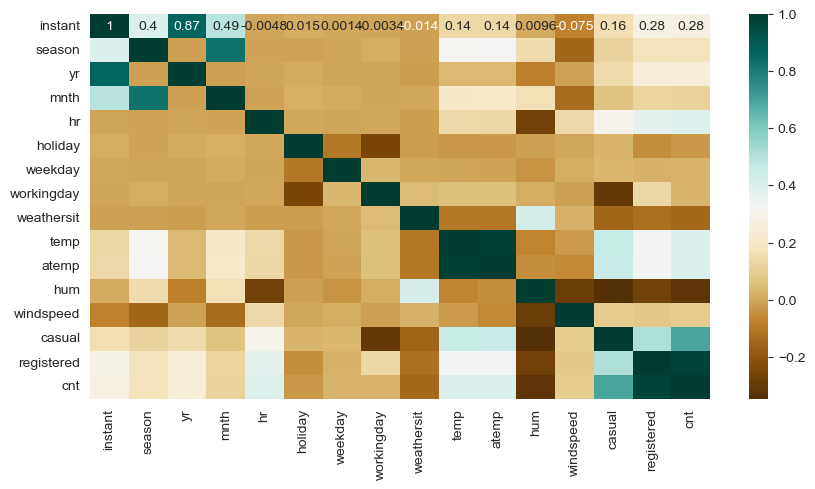

In [35]:
plt.figure(figsize=(10,5))
corr=df.corr(numeric_only=True)
sns.heatmap(corr, cmap='BrBG', annot=True)

Boxplot for the weekday and the amount of hours for each weekday

<Figure size 1200x600 with 0 Axes>

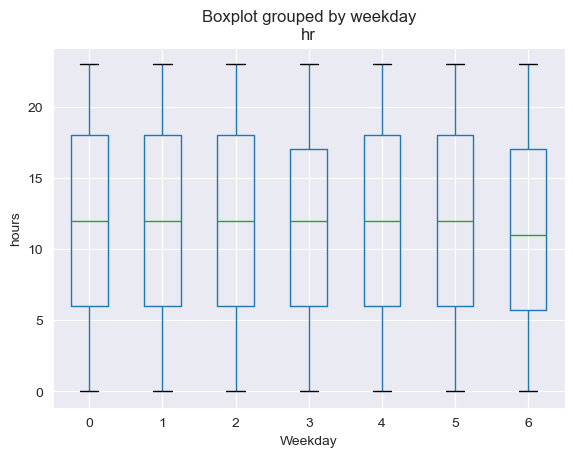

In [36]:
plt.figure(figsize=(12, 6))
boxplot = df.boxplot(column=['hr'], by='weekday')

plt.xlabel('Weekday')
plt.ylabel('hours')
plt.show()

Find out if data is missing (answer: no)

In [37]:
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Visualize outliers in the column "cnt"

<Axes: xlabel='cnt'>

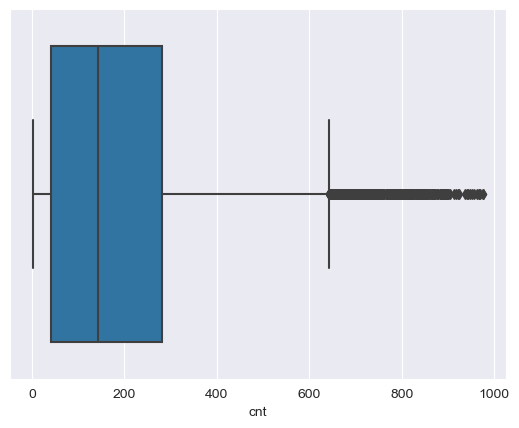

In [38]:
sns.boxplot(x=df['cnt'])

Use 'power transform' method to make data appear more normally distributed, remove column 'dteday' and save that data frame to new variable

In [39]:
from sklearn.preprocessing import PowerTransformer
df.drop('dteday', axis=1, inplace=True)
pt = PowerTransformer()
transformed_data = pt.fit_transform(df)
df_new = pd.DataFrame(transformed_data, columns=df.columns)
df_new.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,-2.190524,-1.399107,-1.005134,-1.733283,-1.902877,-0.172112,1.399855,-1.4669,-0.720808,-1.341502,-1.092321,0.947780,-1.770094,-0.906359,-1.261875,-1.252934
1,-2.188491,-1.399107,-1.005134,-1.733283,-1.658943,-0.172112,1.399855,-1.4669,-0.720808,-1.448199,-1.178011,0.894063,-1.770094,-0.396991,-0.804152,-0.791386
2,-2.186651,-1.399107,-1.005134,-1.733283,-1.446865,-0.172112,1.399855,-1.4669,-0.720808,-1.448199,-1.178011,0.894063,-1.770094,-0.655811,-0.900775,-0.916496
3,-2.184942,-1.399107,-1.005134,-1.733283,-1.253144,-0.172112,1.399855,-1.4669,-0.720808,-1.341502,-1.092321,0.626898,-1.770094,-0.906359,-1.371624,-1.339644
4,-2.183331,-1.399107,-1.005134,-1.733283,-1.072020,-0.172112,1.399855,-1.4669,-0.720808,-1.341502,-1.092321,0.626898,-1.770094,-1.704042,-1.964542,-1.983013


Create training and test data with 'cnt' as the variable to predict 

In [40]:
from sklearn.model_selection import train_test_split
# variables without 'cnt'
X = df_new.drop('cnt', axis=1)
# target variable
y = df_new['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Perform linear regression with R2-metric

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
# train model on the training data
model.fit(X_train, y_train)
# predict with the test data
y_pred = model.predict(X_test)
# compare the predictions with the test labels
r2 = r2_score(y_test, y_pred)
print('R2-Score: ', r2)

R2-Score:  0.9965415931622895
